In [23]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import pydtmc

import pdb
# warnings.filterwarnings('ignore')

In [2]:
# ----- LOAD DATA -----
data = pd.read_csv('all_annotations.csv')

# ----- FIGURES -----
outp = os.path.join('figures','2024September')

In [9]:
# ----- SET UP COLORS -----
acols = [[0.627451,   0.57254905, 0.37254903],
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2]
mcols = acols[2:]

fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
apal = sns.color_palette(acols)

# set hue order
ho = ['WT','Het']

In [68]:
# ----- TRANSITION MATRIX FUNCTION -----
def calculate_transition_matrix(data,normaxis):
    
    # use data to extract transitions
    data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
    transitions = data.groupby(['behavior', 'next_behav']) # organize by unique behavior transitions
    counts = {i[0]:len(i[1]) for i in transitions} # count up instances of transitions
    
    # generate behavior x behavior matrix
    behavs = sorted(data.behavior.unique())
    matrix = pd.DataFrame()

    for x in behavs: # count up transition numbers
        matrix[x] = pd.Series([counts.get((x,y), 0) for y in behavs], index=behavs)        
        
    cols = matrix.columns
    
    # calculate probabilities across row
    matrix[cols] = matrix[cols].div(matrix[cols].sum(axis=normaxis), axis=normaxis)
    
    return matrix

def filter_data_and_calculate_transitions(data,assay,sex,gt,normaxis):
    
    adf = data[data.assay==assay]
    filt = adf[np.logical_and(adf.sex==sex,adf.GT==gt)]
       
    tmatrix = calculate_transition_matrix(filt,normaxis)
    
    return tmatrix

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\4102607850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


<AxesSubplot: >

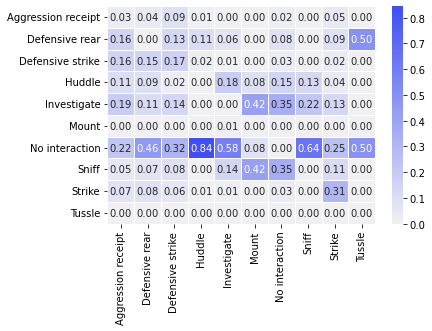

In [66]:
# ----- TEST TRANSITION MATRIX FUNCTIONS -----
assay = 'introduction'
sex = 'F'
gt = 'WT'

test = filter_data_and_calculate_transitions(data,assay,sex,gt)
sns.heatmap(test,cmap=upal,annot=True,linewidth=.5,fmt=".2f")

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


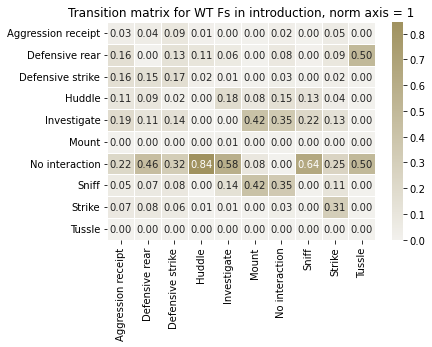

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


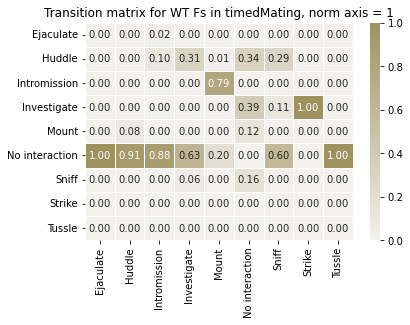

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


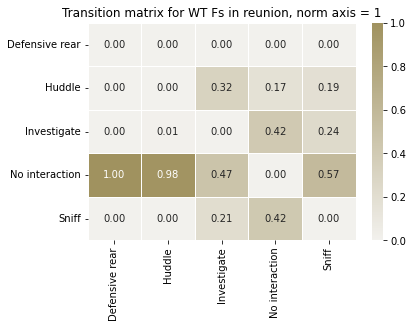

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


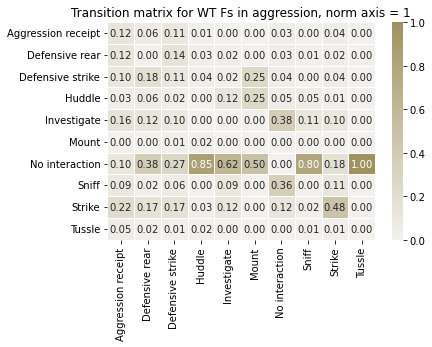

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


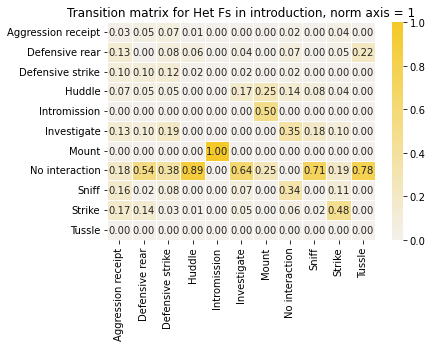

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


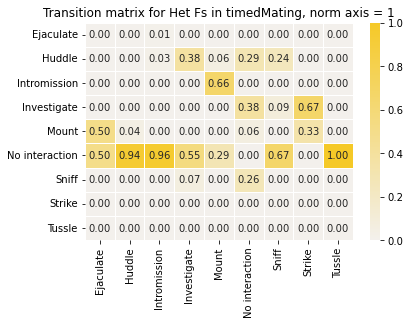

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


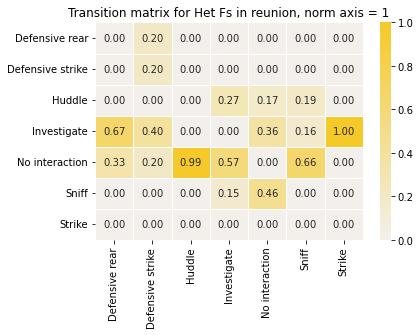

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


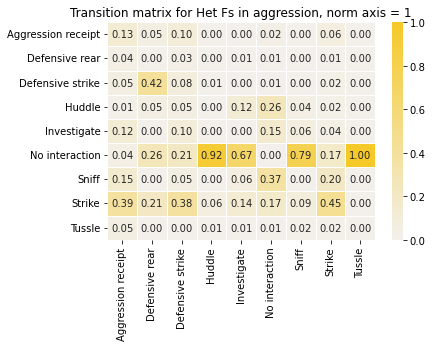

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


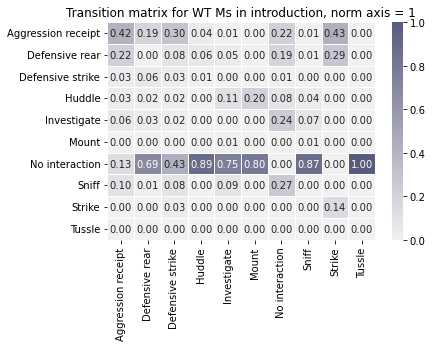

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


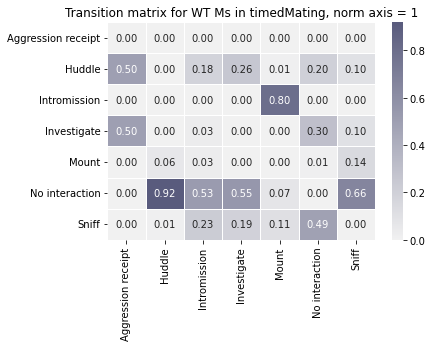

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


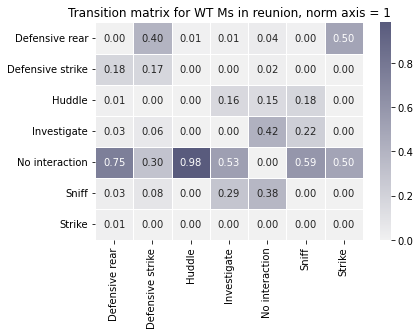

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


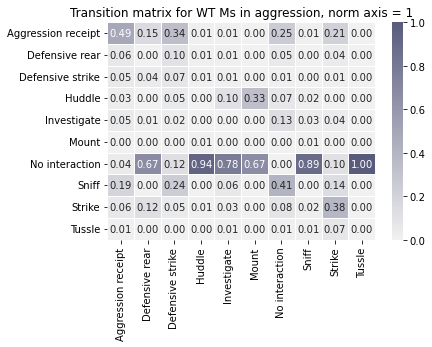

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


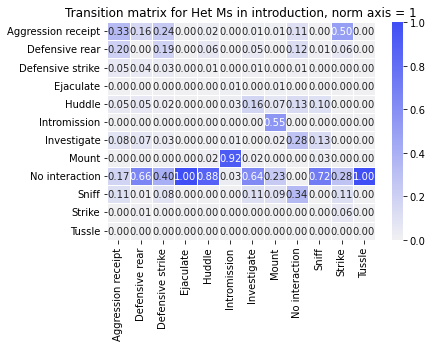

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


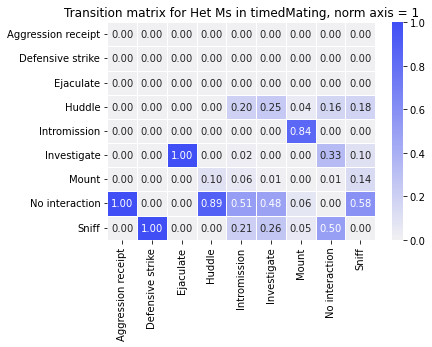

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


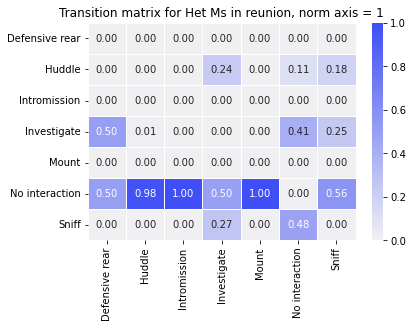

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


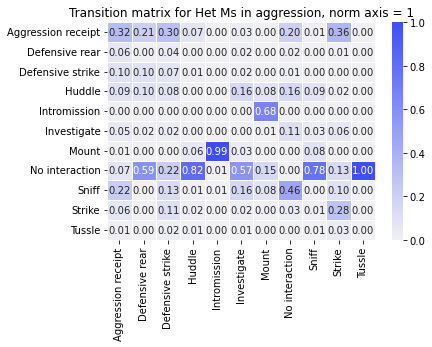

In [71]:
# ----- MAKE TRANSITION MATRICES FOR ALL ASSAYS AND GROUPS -----

assays = ['introduction','timedMating','reunion','aggression']
sexes = ['F','M']
genotypes = ['WT','Het']
normaxis = 1
saveplots = True

cc = 0

for i,sex in enumerate(sexes):
    for j,gt in enumerate(genotypes):
        for assay in assays:
            upal = sns.light_palette(acols[cc], as_cmap=True)
            tmat = filter_data_and_calculate_transitions(data,assay,sex,gt,normaxis)
            fig = plt.figure()
            hmap = sns.heatmap(tmat,cmap=upal,annot=True,linewidth=.5,fmt=".2f")
            ttl = f'Transition matrix for {gt} {sex}s in {assay}, norm axis = {normaxis}'
            hmap.set(title=ttl)
            fname = f'transitionProbs_{assay}_{sex}_{gt}_normaxis{normaxis}.png'
            plt.show()
            if saveplots:
                fig.savefig(os.path.join(outp,fname))

        cc+=1

In [57]:
# ----- TRY TO MAKE A TRANSITION MATRIX -----
assay = 'introduction'

introdf = data[data.assay==assay]

# need to make transitions for each pair individually
# then I can aggregate counts for test groups
# make 4 matrices of transition probabilities

introdf['next_behav'] = introdf.groupby('pair_tag').behavior.shift(periods=-1)

sex = 'F'
gt = 'WT'

thisdf = introdf[np.logical_and(introdf.sex==sex,introdf.GT==gt)]
theseTransitions = thisdf.groupby(['behavior', 'next_behav'])
theseCounts = {i[0]:len(i[1]) for i in theseTransitions}

behavs = sorted(thisdf.behavior.unique())

matrix = pd.DataFrame()

for x in behavs:
    matrix[x] = pd.Series([theseCounts.get((x,y), 0) for y in behavs], index=behavs)
    
# cols = matrix.columns
# matrix[cols] = matrix[cols].div(matrix[cols].sum(axis=1), axis=0)
    
matrixnp = matrix.to_numpy()

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\3857501334.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  introdf['next_behav'] = introdf.groupby('pair_tag').behavior.shift(periods=-1)


In [73]:
len(theseCounts)

69

In [59]:
matrix

,Aggression receipt,Defensive rear,Defensive strike,Huddle,Investigate,Mount,No interaction,Sniff,Strike,Tussle
Aggression receipt,3,14,15,8,3,0,44,0,8,0
Defensive rear,15,0,22,65,62,0,147,4,14,2
Defensive strike,15,50,28,13,5,0,54,0,4,0
Huddle,10,31,3,0,175,1,279,111,6,0
Investigate,18,37,23,1,0,5,665,191,22,0
Mount,0,0,0,0,9,0,1,2,0,0
No interaction,21,151,54,520,561,1,0,563,41,2
Sniff,5,22,14,1,136,5,673,0,18,0
Strike,7,26,10,5,11,0,53,1,50,0
Tussle,0,0,0,1,0,0,1,2,0,0


In [60]:
18+37+23+1+0+5+665+191+22

962

In [61]:
665/962

0.6912681912681913

In [5]:
mc = pydtmc.MarkovChain(matrixnp,behavs)

(<Figure size 600x400 with 1 Axes>, <AxesSubplot: >)

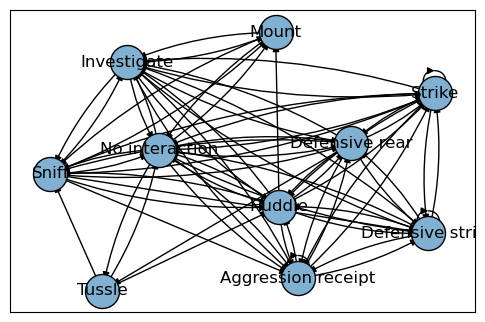

In [6]:
pydtmc.plot_graph(mc,nodes_color=True,edges_label=False)

<AxesSubplot: >

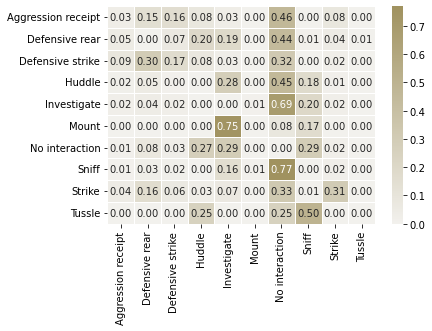

In [12]:
upal = sns.light_palette(acols[0], as_cmap=True)
sns.heatmap(matrix,cmap=upal,annot=True,linewidth=.5,fmt=".2f")

In [13]:
import networkx as nx
G = nx.from_pandas_adjacency(matrix)

In [16]:
nx.adjacency_matrix(G)

<10x10 sparse array of type '<class 'numpy.float64'>'
	with 75 stored elements in Compressed Sparse Row format>

In [18]:
seed = 20240912
pos = nx.spring_layout(G, seed=seed)

In [19]:
pos

{'Aggression receipt': array([-1.        , -0.14912132]),
 'Defensive rear': array([-0.32330581, -0.27684592]),
 'Defensive strike': array([-0.57212437, -0.57022282]),
 'Huddle': array([-0.09636835,  0.66646164]),
 'Investigate': array([ 0.45781238, -0.32155151]),
 'Mount': array([ 0.80302492, -0.60410927]),
 'No interaction': array([0.15524037, 0.20286208]),
 'Sniff': array([0.471242 , 0.2836744]),
 'Strike': array([-0.2982728 ,  0.07868326]),
 'Tussle': array([0.40275166, 0.69016946])}

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10736\469220923.py:9: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  edges = nx.draw_networkx_edges(


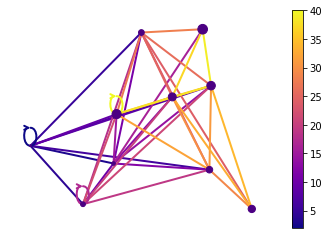

In [30]:
node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
# edge_colors = matrixnp
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)

# for i in range(M):
#     edges[i].set_alpha(edge_alphas[i])

# pc = mpl.collections.PatchCollection(edges, cmap=cmap)
# pc.set_array(edge_colors)
edges.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(edges, ax=ax)
plt.show()

In [72]:
M

39